# Discrete Probability Distribution Plot

In [1]:
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

In [2]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    import sys

    sys.path.append("scripts")  # Don't change to "../scripts", instead, run this nb from repo's root with ipython
    from plot_utils import latexify, savefig

    latexify(width_scale_factor=2)

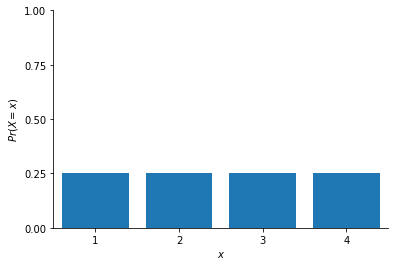

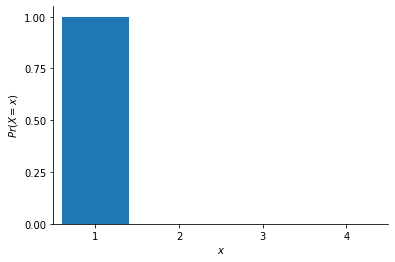

In [3]:
# Bar graphs showing a uniform discrete distribution and another with full mass on one value.

N = 4


def make_graph(probs, N, save_name, fig=None, ax=None):
    x = jnp.arange(1, N + 1)
    if fig is None:
        fig, ax = plt.subplots()
    ax.bar(x, probs, align="center")
    ax.set_xlim([min(x) - 0.5, max(x) + 0.5])
    ax.set_xticks(x)
    ax.set_yticks(jnp.linspace(0, 1, N + 1))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$Pr(X=x)$")
    sns.despine()
    if LATEXIFY and len(save_name) > 0:
        savefig(save_name)
    return fig, ax


uniform_probs = jnp.repeat(1.0 / N, N)
_, _ = make_graph(uniform_probs, N, "uniform_histogram_latexified.pdf")

delta_probs = jnp.array([1, 0, 0, 0])
_, _ = make_graph(delta_probs, N, "delta_histogram_latexified.pdf");

## Demo

You can see different examples of discrete distributions by changing the seed in the following demo.

In [4]:
from ipywidgets import interact


@interact(random_state=(1, 10), N=(2, 10))
def generate_random(random_state, N):
    key = jax.random.PRNGKey(random_state)
    probs = jax.random.uniform(key, shape=(N,))
    probs = probs / jnp.sum(probs)
    fig, ax = make_graph(probs, N, "")
    ax.set_yticks(jnp.linspace(0, 1, 11))

interactive(children=(IntSlider(value=5, description='random_state', max=10, min=1), IntSlider(value=6, descri…